# Data loading

In [1]:
print("Hello Jupyter")


Hello Jupyter


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

numpy: 2.2.6
pandas: 2.3.1
matplotlib: 3.10.5
seaborn: 0.13.2


In [3]:

df = pd.read_csv("mesa_agent_results.csv")
df.head()


,day,hour,step,agent_id,agent_type,room,current_temp,comfort_level,using_ac,preferred_temp
0,NaN,NaN,0,student_0,student,Zone_Restroom_7503,23.0,23.0,True,25.629526
1,NaN,NaN,0,student_1,student,Zone_Restroom_7116,23.0,23.0,True,25.623995
2,NaN,NaN,0,student_2,student,Zone_Restroom_7406,23.0,23.0,False,24.306959
3,NaN,NaN,0,student_3,student,Zone_Corridor_7101,23.0,23.0,False,24.494739
4,NaN,NaN,0,student_4,student,Zone_Elec/MechRoom_7307,23.0,23.0,True,25.736001


In [ ]:
df.isnull().sum()

In [ ]:
df['comfort_level'] = df['comfort_level'].fillna(0)

In [ ]:
df.dtypes

In [ ]:
if "room" not in df.columns:
    print("Nan")
else:
    unique_rooms = df["room"].dropna().unique()
    unique_rooms = sorted(unique_rooms)

    print(f"Found {len(unique_rooms)} zones:\n")
    for r in unique_rooms:
        print("-", r)

In [ ]:
df.describe()

In [ ]:
print(df['step'].min(), df['step'].max())
print(df['day'].unique())


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['day'] = (df['step'] // 96) + 1
num_days = df['day'].max()

for day in range(1, num_days + 1):
    df_day = df[df['day'] == day].copy()
    
    if len(df_day) == 0:
        continue
    
    pivot_df = df_day.pivot_table(
        index='step',      
        columns='room',
        values='comfort_level',
        aggfunc='mean'
    )
    
    plt.figure(figsize=(14, 10))
    
    sns.heatmap(
        pivot_df,
        cmap='RdYlGn_r',  
        linewidths=0.5,
        linecolor='white',
        cbar_kws={'label': 'Comfort Level'}
    )
    
    plt.title(f'Occupant Comfort Heat Map - Day {day}', fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Room', fontsize=11, fontweight='bold')
    plt.ylabel('Step (Continuous)', fontsize=11, fontweight='bold')
    
    step_values = pivot_df.index.values
    if len(step_values) > 8:
        yticks_positions = list(range(0, len(pivot_df), 8))
        yticks_labels = [step_values[i] for i in yticks_positions]
        plt.yticks(yticks_positions, yticks_labels, rotation=0, fontsize=9)
    
    plt.xticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()


# Analysis

In [9]:
step0_df = df[df['step'] == 0]

rooms_in_step0 = step0_df['room'].unique()

print("agent inside room step 0:")
for i, room in enumerate(rooms_in_step0, 1):
    print(f"{i}. {room}")

print(f"\n📊 total {len(rooms_in_step0)}")


agent inside room step 0:
1. Zone_Restroom_7503
2. Zone_Restroom_7116
3. Zone_Restroom_7406
4. Zone_Corridor_7101
5. Zone_Elec/MechRoom_7307
6. Zone_Classroom_7415
7. Zone_Classroom_7312
8. Zone_Classroom_7314
9. Zone_Classroom_7401
10. Zone_Auditorium_7104
11. Zone_ClosedOffice_7108
12. Zone_Storage_7104_Pantry
13. Zone_ClosedOffice_7110
14. Zone_Elec/MechRoom_7113
15. Zone_Auditorium_7102
16. Zone_ClosedOffice_7120
17. Zone_Corridor_F3
18. Zone_Classroom_7418
19. Zone_Classroom_7204
20. Zone_Central-hall_F2-3
21. Zone_Classroom_7205
22. Zone_Classroom_7410
23. Zone_Classroom_7402
24. Zone_Auditorium_7502
25. Zone_Office_7316
26. Zone_Classroom_7405
27. Zone_Elec/MechRoom_7122
28. Zone_Classroom_7201
29. Zone_ClosedOffice_7118
30. Zone_Office_7211
31. Zone_Corridor_F4
32. Zone_Classroom_7202
33. Zone_Classroom_7303
34. Zone_Classroom_7313
35. Zone_Restroom_7112
36. Zone_Classroom_7411
37. Zone_Library_7117
38. Zone_Classroom_7210
39. Zone_Classroom_7422
40. Zone_Classroom_7311
41. Zon

In [12]:
step0_df = df[df['step'] == 1]

rooms_in_step0 = step0_df['room'].unique()

print("agent inside room step 0:")
for i, room in enumerate(rooms_in_step0, 1):
    print(f"{i}. {room}")

print(f"\n📊 total {len(rooms_in_step0)}")

agent inside room step 0:
1. Zone_Restroom_7503
2. Zone_Restroom_7116
3. Zone_Restroom_7406
4. Zone_Corridor_7101
5. Zone_Elec/MechRoom_7307
6. Zone_Classroom_7415
7. Zone_Classroom_7312
8. Zone_Classroom_7314
9. Zone_Classroom_7401
10. Zone_Auditorium_7104
11. Zone_ClosedOffice_7108
12. Zone_Storage_7104_Pantry
13. Zone_ClosedOffice_7110
14. Zone_Elec/MechRoom_7113
15. Zone_Auditorium_7102
16. Zone_ClosedOffice_7120
17. Zone_Corridor_F3
18. Zone_Classroom_7418
19. Zone_Classroom_7204
20. Zone_Central-hall_F2-3
21. Zone_Classroom_7205
22. Zone_Classroom_7410
23. Zone_Classroom_7402
24. Zone_Auditorium_7502
25. Zone_Office_7316
26. Zone_Classroom_7405
27. Zone_Elec/MechRoom_7122
28. Zone_Classroom_7201
29. Zone_ClosedOffice_7118
30. Zone_Office_7211
31. Zone_Corridor_F4
32. Zone_Classroom_7202
33. Zone_Classroom_7303
34. Zone_Classroom_7313
35. Zone_Restroom_7112
36. Zone_Classroom_7411
37. Zone_Library_7117
38. Zone_Classroom_7210
39. Zone_Classroom_7422
40. Zone_Classroom_7311
41. Zon

In [13]:
# รวมจำนวน agent ในแต่ละห้อง ตามแต่ละ step
room_counts = df.groupby(['step', 'room'])['agent_id'].count().reset_index()

# เปลี่ยนชื่อคอลัมน์ให้ดูเข้าใจง่าย
room_counts = room_counts.rename(columns={'agent_id': 'agent_count'})

# ดูตัวอย่าง 10 แถวแรก
room_counts.head(10)


,step,room,agent_count
0,0,Zone_Auditorium_7102,29
1,0,Zone_Auditorium_7103,28
2,0,Zone_Auditorium_7104,37
3,0,Zone_Auditorium_7501,21
4,0,Zone_Auditorium_7502,27
5,0,Zone_Auditorium_7508,19
6,0,Zone_Central-hall_F2-3,24
7,0,Zone_Classroom_7201,28
8,0,Zone_Classroom_7202,25
9,0,Zone_Classroom_7203,39


In [14]:
# รวมจำนวน agent ทั้งหมดในแต่ละห้อง (ทุก step)
top_rooms = df.groupby('room')['agent_id'].count().reset_index()

# เปลี่ยนชื่อคอลัมน์ให้เข้าใจง่าย
top_rooms = top_rooms.rename(columns={'agent_id': 'total_agent_visits'})

# เรียงจากมากไปน้อย และเอาแค่ 10 อันดับแรก
top10_rooms = top_rooms.sort_values(by='total_agent_visits', ascending=False).head(10)

# แสดงผล
print(top10_rooms)


                      room  total_agent_visits
9      Zone_Classroom_7203               11232
15     Zone_Classroom_7308               10944
39  Zone_ClosedOffice_7120               10944
34     Zone_Classroom_7422               10656
2     Zone_Auditorium_7104               10656
52         Zone_Elevator_L                9504
32     Zone_Classroom_7418                9504
66      Zone_Restroom_7406                9504
59        Zone_Office_7301                9216
42        Zone_Corridor_F1                9216


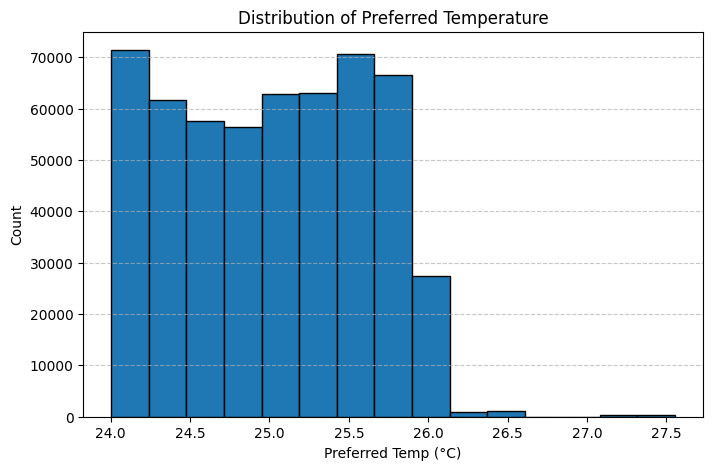

In [15]:
plt.figure(figsize=(8,5))
plt.hist(df["preferred_temp"].to_numpy(), bins=15, edgecolor="black")
plt.xlabel("Preferred Temp (°C)")
plt.ylabel("Count")
plt.title("Distribution of Preferred Temperature")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
df['day'] = (df['step'] // 96) + 1
df['hour'] = (df['step'] % 96) / 4  
df['ac_on'] = df['using_ac'].astype(int)

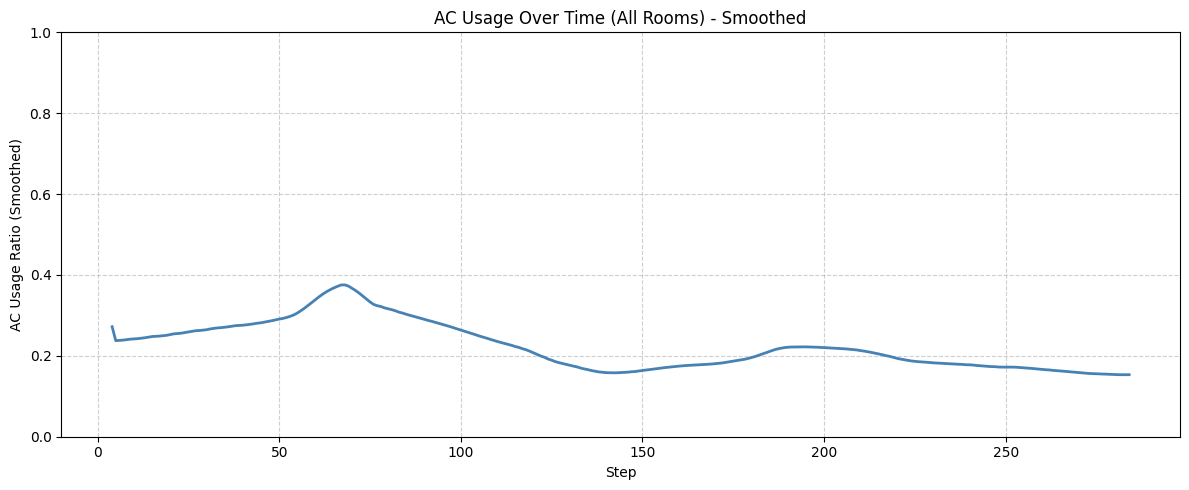

In [18]:

plt.figure(figsize=(12, 5))


ac_usage = df.groupby('step')['ac_on'].mean().reset_index()


window = 8
ac_usage['smooth'] = ac_usage['ac_on'].rolling(window=window, center=True).mean()

sns.lineplot(data=ac_usage, x='step', y='smooth', linewidth=2, color='steelblue')

plt.title("AC Usage Over Time (All Rooms) - Smoothed")
plt.xlabel("Step")
plt.ylabel("AC Usage Ratio (Smoothed)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.ylim(0, 1)  
plt.tight_layout()

plt.savefig("ac_usage_over_time_(all_rooms).png", dpi=300)
plt.show()


/tmp/ipykernel_2405393/3381721608.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


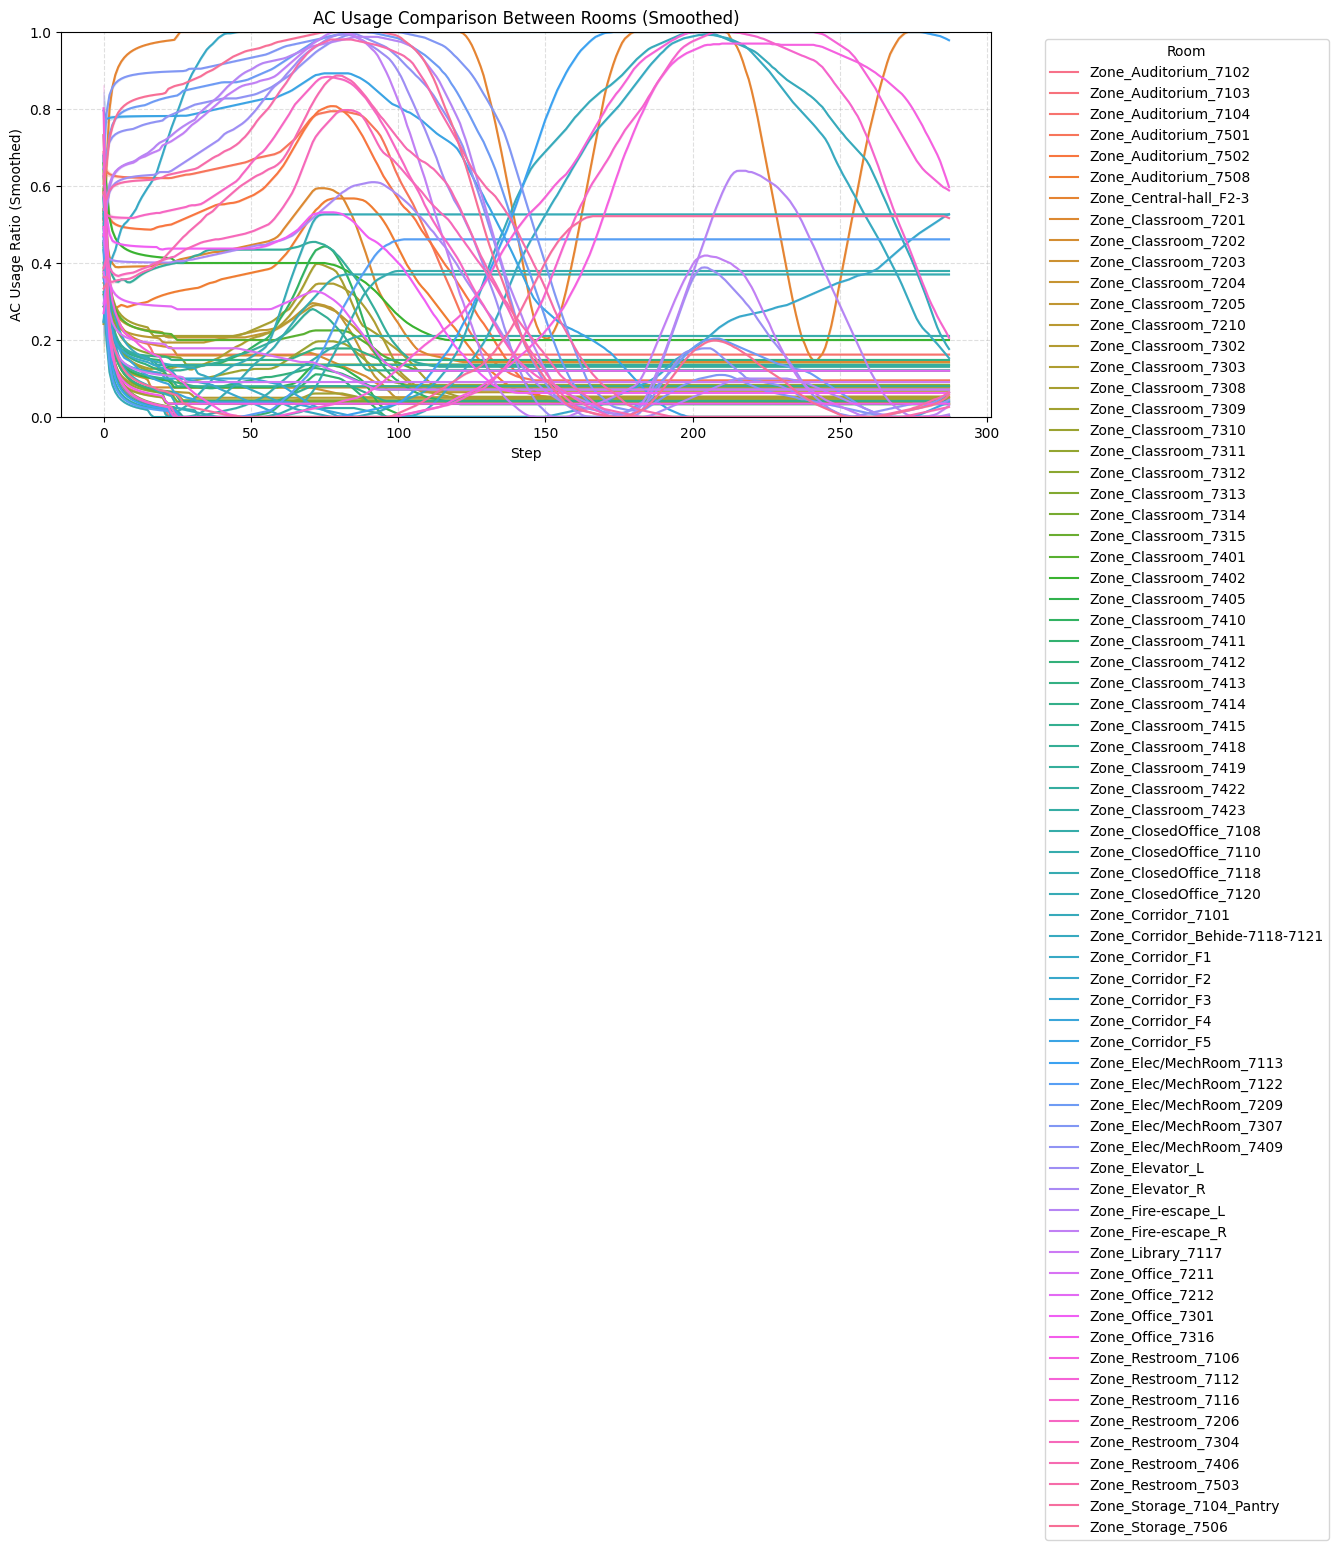

In [19]:
plt.figure(figsize=(12, 5))

df_sorted = df.sort_values(['room', 'step'])
df_sorted['ac_usage_smooth'] = (
    df_sorted.groupby('room')['ac_on']
    .transform(lambda x: x.rolling(window=600, min_periods=1).mean())
)

sns.lineplot(data=df_sorted, x='step', y='ac_usage_smooth', hue='room')

plt.title("AC Usage Comparison Between Rooms (Smoothed)")
plt.xlabel("Step")
plt.ylabel("AC Usage Ratio (Smoothed)")
plt.ylim(0, 1)  
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(title="Room", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("ac_usage_comparison_between_rooms.png", dpi=300)
plt.show()


In [ ]:

daily_ac = df.groupby('step')['ac_on'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(
    data=daily_ac,
    x='step', 
    y='ac_on', 
    hue='step',        
    palette='viridis',
    legend=False      
)
plt.title("Daily Energy Consumption Pattern (AC Usage %)")
plt.ylabel("Average AC On Ratio")
plt.tight_layout()
plt.show()

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


hourly = df.groupby('step')['ac_on'].mean().reset_index()


window_size = 8  
hourly['ac_on_smooth'] = hourly['ac_on'].rolling(window=window_size, center=True).mean()

plt.figure(figsize=(10, 4))
sns.lineplot(data=hourly, x='step', y='ac_on_smooth', color='orange', linewidth=2.5, label=f'Smoothed (window={window_size})')
sns.lineplot(data=hourly, x='step', y='ac_on', color='gray', alpha=0.3, label='Raw')

plt.title("Peak AC Usage Hours (Smoothed)", fontsize=13, fontweight='bold')
plt.xlabel("Step (Time Progression)")
plt.ylabel("AC Usage Ratio")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

plt.savefig("peak_ac_usage_hours.png", dpi=300)
plt.show()


In [ ]:
# ---------- 5. Comfort Level Heatmap (เฉลี่ยทุก 8 step ≈ 2 ชม.) ----------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สมมติ df มีคอลัมน์: 'step', 'room', 'comfort_level'
df['step_group'] = (df['step'] // 8) * 8  # จัดกลุ่ม step ละ 8

# หาค่าเฉลี่ย comfort level ในแต่ละกลุ่มและแต่ละห้อง
agg_df = df.groupby(['step_group', 'room'])['comfort_level'].mean().reset_index()

# Pivot เพื่อทำ heatmap
pivot_df = agg_df.pivot(index='step_group', columns='room', values='comfort_level')

# ---------- Plot ----------
plt.figure(figsize=(30, 10))  # ลดความกว้างลงจาก 14 → 10
sns.heatmap(
    pivot_df,
    cmap='RdYlGn',
    cbar_kws={'label': 'Comfort Level'},
    linewidths=0.5,
    annot=False,
    square=False,          # อนุญาตให้ช่องเป็นแนวตั้งมากกว่าแนวนอน
    xticklabels=True,
    yticklabels=True
)

plt.title("Comfort Level Heatmap (Averaged Every 8 Steps ≈ 2 Hours)", fontsize=13, fontweight='bold')
plt.xlabel("Room")
plt.ylabel("Step (Grouped by 8)")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

plt.savefig("comfort_heatmap.png", dpi=300)  
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# สมมติใช้ AC = 1 unit per step
df['energy_usage'] = df['using_ac'].astype(int)

# จัดกลุ่ม step ละ 8 (~2 ชั่วโมง)
df['step_group'] = (df['step'] // 8) * 8

# รวมค่าเฉลี่ย Energy Usage ต่อ step_group ต่อห้อง
agg_energy = df.groupby(['step_group', 'room'])['energy_usage'].mean().reset_index()

# Pivot เพื่อทำ heatmap
pivot_energy = agg_energy.pivot(index='step_group', columns='room', values='energy_usage')

# ---------- Plot ----------
plt.figure(figsize=(30, 10))  # กะให้คล้ายกับ comfort heatmap
sns.heatmap(
    pivot_energy,
    cmap='YlOrRd',               # สีเหลือง→แดง = พลังงานสูง
    cbar_kws={'label': 'Estimated Energy Usage (unit/step)'},
    linewidths=0.5,
    annot=False,
    square=False,
    xticklabels=True,
    yticklabels=True
)

plt.title("Estimated Energy Usage Heatmap (Averaged Every 8 Steps ≈ 2 Hours)", fontsize=13, fontweight='bold')
plt.xlabel("Room")
plt.ylabel("Step (Grouped by 8)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig("energy_usage_heatmap.png", dpi=300)
plt.show()


In [ ]:
agg_df = df.groupby(['room', 'step_group']).agg(
    avg_comfort=('comfort_level', 'mean'),
    avg_energy=('energy_usage', 'mean')
).reset_index()

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=agg_df,
    x='avg_comfort',
    y='avg_energy',
    hue='room',
    s=80
)
plt.title("Average Comfort vs Average Energy Usage (per room & step group)")
plt.xlabel("Average Comfort Level")
plt.ylabel("Average Energy Usage")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()

plt.savefig("average_comfort_vs_average_energy_usage.png", dpi=300) 
plt.show()


In [ ]:
# ---------- 6. Distribution of Comfort Levels ----------
plt.figure(figsize=(8, 4))
sns.histplot(df['comfort_level'], kde=True, bins=30, color='green')
plt.title("Distribution of Comfort Levels")
plt.xlabel("Comfort Level")
plt.tight_layout()

plt.savefig("distribution_of_comfort_levels.png", dpi=300)  
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df['preferred_temp'], kde=True, bins=30, color='green')
plt.title("Distribution of Preferred Temp")
plt.xlabel("preferred_temp")
plt.tight_layout()

plt.savefig("distribution_of_preferred_temp.png", dpi=300)  
plt.show()

In [ ]:
# ---------- 7. Comfort vs Temperature Scatter Plot ----------
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='current_temp', y='comfort_level', hue='room', alpha=0.6)
plt.title("Comfort vs Temperature Scatter Plot")
plt.xlabel("Current Temperature (°C)")
plt.ylabel("Comfort Level")
plt.tight_layout()
plt.show()

In [ ]:
# ---------- 8. Average Comfort by Room ----------
avg_comfort = df.groupby('room')['comfort_level'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(data=avg_comfort, x='room', y='comfort_level', palette='RdYlGn')
plt.title("Average Comfort by Room")
plt.ylabel("Average Comfort Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2405393/2656658331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='room', y='current_temp', palette='coolwarm')


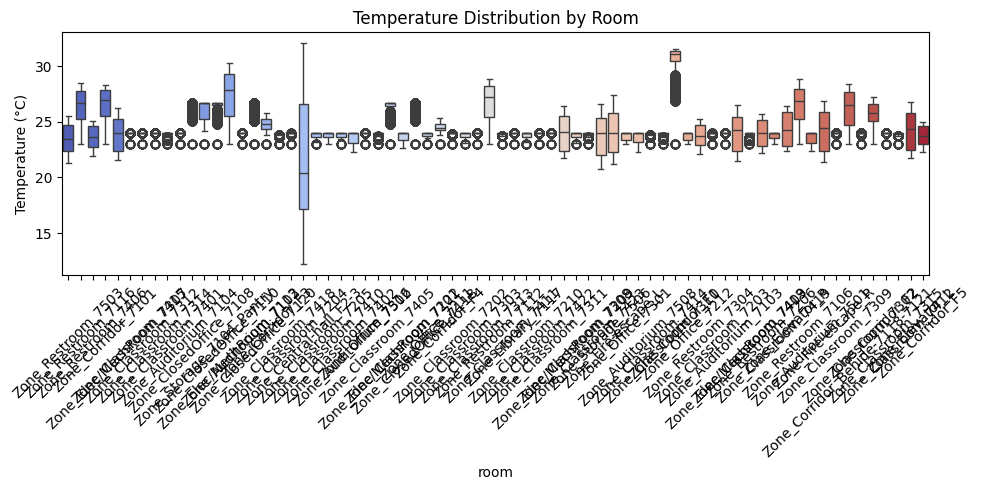

In [4]:
# ---------- 9. Temperature Distribution by Room ----------
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='room', y='current_temp', palette='coolwarm')
plt.title("Temperature Distribution by Room")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# ---------- 10. Temperature vs Time ----------
plt.figure(figsize=(12, 5))

# ใช้ rolling average window = 4 steps (~1 ชั่วโมง ถ้า 1 step = 15 นาที)
df_smooth = df.copy()
window_size = 1000

df_smooth['current_temp_smooth'] = df_smooth.groupby('room')['current_temp'] \
                                             .transform(lambda x: x.rolling(window=window_size, min_periods=1).mean())

sns.lineplot(data=df_smooth, x='step', y='current_temp_smooth', hue='room')
plt.title("Temperature vs Time (All Rooms) - Smoothed")
plt.xlabel("Step")
plt.ylabel("Temperature (°C)")
plt.tight_layout()
plt.show()


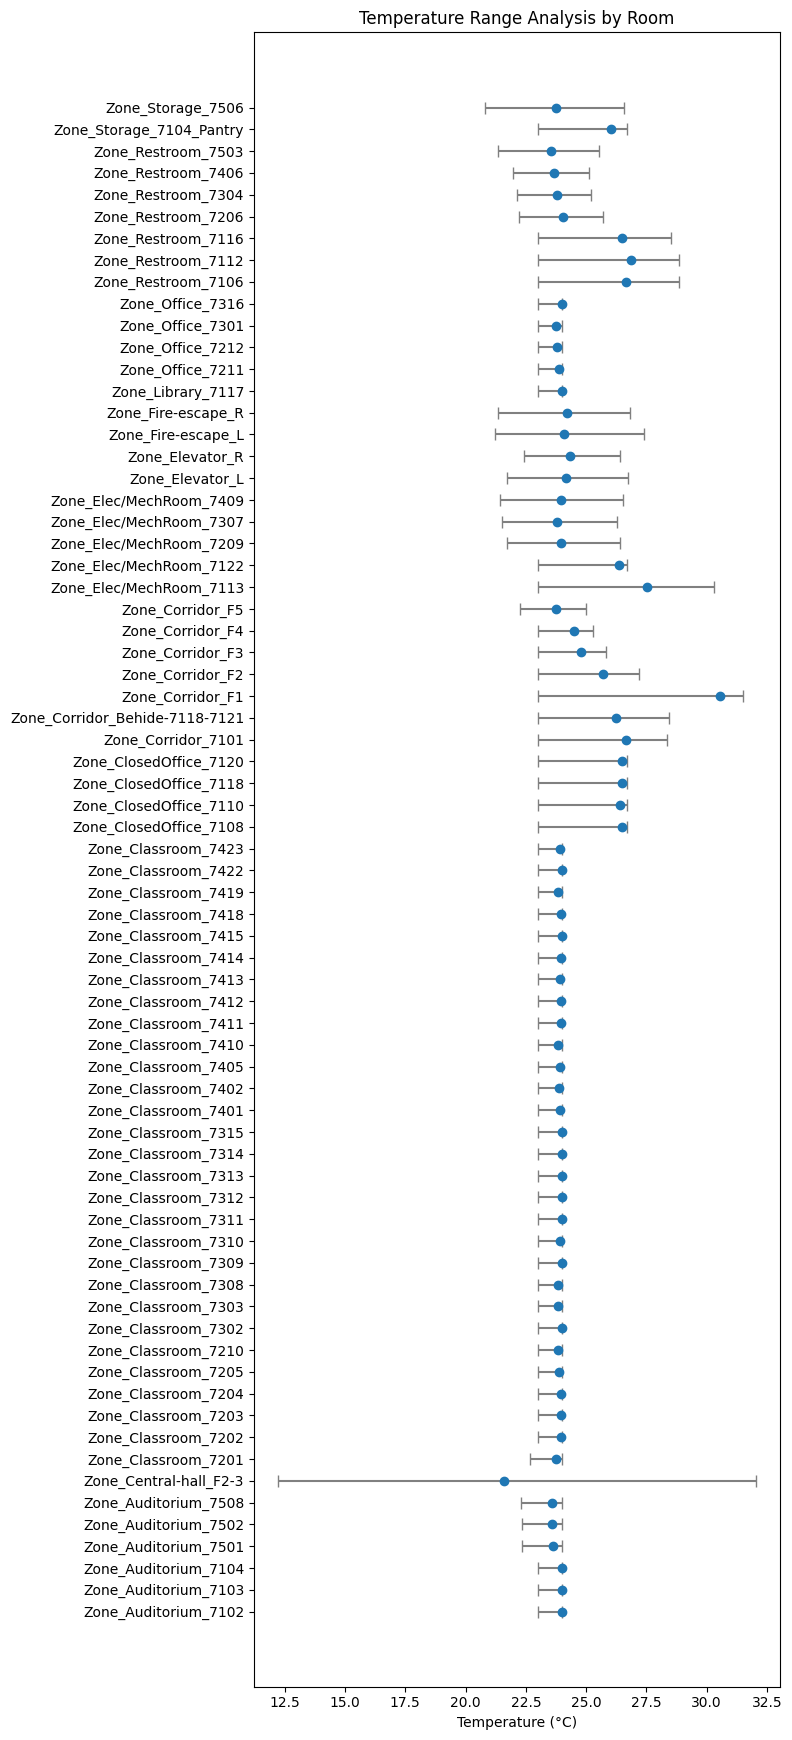

In [6]:
# ---------- 11. Temperature Range Analysis ----------
import pandas as pd
import matplotlib.pyplot as plt

# สร้างสรุป min, mean, max ของอุณหภูมิแต่ละห้อง
temp_stats = df.groupby('room')['current_temp'].agg(['min', 'mean', 'max']).reset_index()

# แสดงผลแบบกราฟแนวนอน (อ่านง่ายขึ้น)
plt.figure(figsize=(8, len(temp_stats)*0.25))
plt.errorbar(temp_stats['mean'], temp_stats['room'],
             xerr=[temp_stats['mean'] - temp_stats['min'], temp_stats['max'] - temp_stats['mean']],
             fmt='o', ecolor='gray', capsize=4)

plt.title("Temperature Range Analysis by Room")
plt.xlabel("Temperature (°C)")
plt.tight_layout()
plt.show()


In [ ]:
# ---------- 12. Summary Table ----------
summary = df.groupby('room').agg(
    Avg_Comfort=('comfort_level', 'mean'),
    AC_Usage=('using_ac', 'mean'),
    Avg_Temp=('current_temp', 'mean')
).reset_index()

# เพิ่ม Energy Efficiency (เชิงสาธิต)
summary['Energy_Efficiency'] = (1 - summary['AC_Usage']) * summary['Avg_Comfort'] / summary['Avg_Temp']

summary['AC_Usage'] = summary['AC_Usage'] * 100  # เปลี่ยนเป็น %
print("\n=== Summary Table ===")
print(summary.rename(columns={
    'room': 'Room',
    'Avg_Comfort': 'Avg Comfort',
    'AC_Usage': 'AC Usage (%)',
    'Avg_Temp': 'Avg Temp',
    'Energy_Efficiency': 'Energy Efficiency'
}).round(3))

In [ ]:
# --- 2️⃣ สร้างตารางสรุป ---
summary = df.groupby('room').agg(
    Avg_Comfort=('comfort_level', 'mean'),
    AC_Usage=('using_ac', 'mean'),
    Avg_Temp=('current_temp', 'mean')
).reset_index()

summary['Energy_Efficiency'] = (1 - summary['AC_Usage']) * summary['Avg_Comfort'] / summary['Avg_Temp']

# --- 3️⃣ ปรับชื่อคอลัมน์ให้อ่านง่าย ---
summary_display = summary.rename(columns={
    'room': 'Room',
    'Avg_Comfort': 'Avg Comfort',
    'AC_Usage': 'AC Usage (%)',
    'Avg_Temp': 'Avg Temp',
    'Energy_Efficiency': 'Energy Efficiency'
}).round(3)

# --- 4️⃣ แสดงผลแบบตาราง ---
fig, ax = plt.subplots(figsize=(10, len(summary_display)*0.5 + 1))
ax.axis('off')
table = ax.table(cellText=summary_display.values, colLabels=summary_display.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.show()

# --- 5️⃣ (เลือกได้) บันทึกเป็น CSV ---
summary_display.to_csv('summary_by_room.csv', index=False)

IndexError: list index out of range

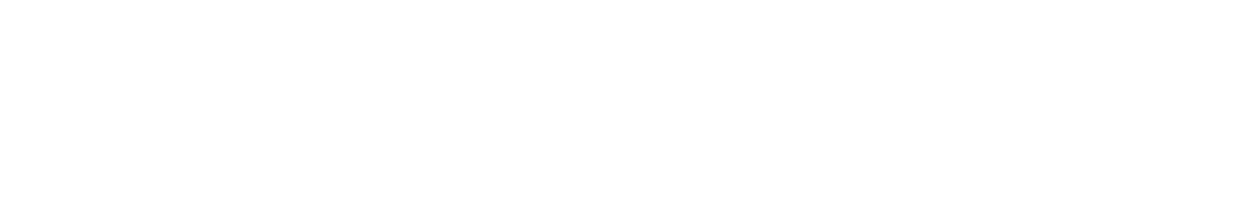

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table


# เลือกเฉพาะ step = 1
df_step1 = df[df['step'] == 1]

# เลือก 5 แถวแรกและตัดคอลัมน์ day, hour
df_top5 = df_step1.head(5).drop(columns=['day', 'hour'])

# ปรับ figsize ให้กว้างขึ้น
fig, ax = plt.subplots(figsize=(16, 2.5))  # กว้างขึ้นและสูงเล็กน้อย
ax.axis('off')  # ไม่แสดงแกน

# ปรับความกว้างของแต่ละคอลัมน์
col_widths = [0.12, 0.12, 0.25, 0.12, 0.12, 0.12, 0.12]  # ปรับตามจำนวนคอลัมน์และความเหมาะสม

# วาด table
tbl = table(ax, df_top5, loc='center', cellLoc='center', colWidths=col_widths)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)  # ปรับ scale cell

# บันทึกเป็นไฟล์ภาพ
plt.savefig("step1_top5_table.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# สมมติ summary เป็น DataFrame ของคุณ
summary_display = summary.rename(columns={
    'room': 'Room',
    'Avg_Comfort': 'Avg Comfort',
    'AC_Usage': 'AC Usage (%)',
    'Avg_Temp': 'Avg Temp',
    'Energy_Efficiency': 'Energy Efficiency'
}).round(3)

# สร้างภาพ
fig, ax = plt.subplots(figsize=(10, len(summary_display)*0.5 + 1))  # ปรับขนาดตามจำนวน row
ax.axis('off')  # ซ่อนแกน

# แสดงตาราง
tbl = ax.table(
    cellText=summary_display.values,
    colLabels=summary_display.columns,
    cellLoc='center',
    loc='center'
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.auto_set_column_width(col=list(range(len(summary_display.columns))))

# บันทึกเป็นไฟล์ภาพ
plt.savefig("summary_table.png", bbox_inches='tight', dpi=300)
plt.show()


In [8]:
print(df_top5.columns)
print(len(df_top5.columns))

Index(['step', 'agent_id', 'agent_type', 'room', 'current_temp',
       'comfort_level', 'using_ac', 'preferred_temp'],
      dtype='object')
8


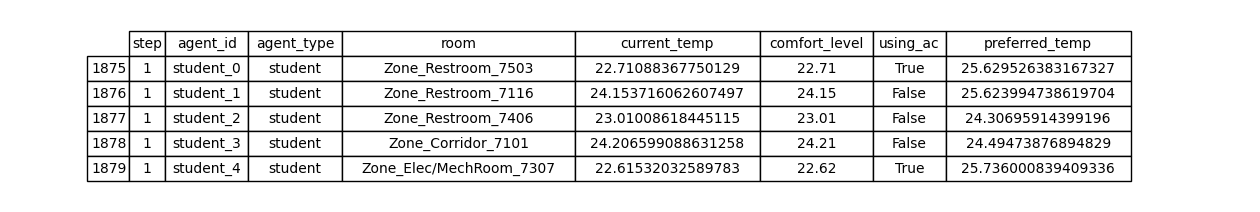

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# เลือกเฉพาะ step = 1
df_step1 = df[df['step'] == 1]

# เลือก 5 แถวแรกและตัดคอลัมน์ day, hour
df_top5 = df_step1.head(5).drop(columns=['day', 'hour'])

# ปรับ figsize ให้กว้างขึ้น
fig, ax = plt.subplots(figsize=(16, 2.5))
ax.axis('off')

# วาด table โดยใช้ colWidths อัตโนมัติ
tbl = table(ax, df_top5, loc='center', cellLoc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.auto_set_column_width(col=list(range(len(df_top5.columns))))  # กว้างอัตโนมัติ
tbl.scale(1, 1.5)

# บันทึกเป็นไฟล์ภาพ
plt.savefig("step1_top5_table.png", dpi=300, bbox_inches='tight')
plt.show()


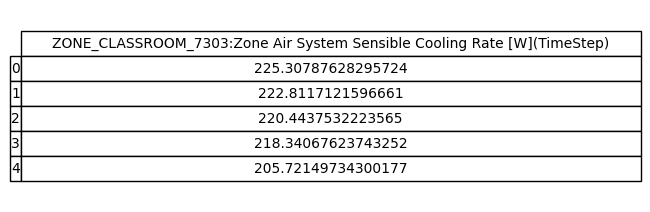

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# โหลดไฟล์ EnergyPlus CSV
df_eplus = pd.read_csv("eplusout.csv")  # แก้ชื่อไฟล์ให้ตรงกับไฟล์จริง

# เลือกคอลัมน์ห้องที่สนใจ
col_name = "ZONE_CLASSROOM_7303:Zone Air System Sensible Cooling Rate [W](TimeStep)"

# ดึง 5 แถวแรก
top5 = df_eplus[[col_name]].head(5)

# สร้างภาพตาราง
fig, ax = plt.subplots(figsize=(8, 2.5))  # ปรับขนาดตามต้องการ
ax.axis('off')  # ซ่อนแกน

tbl = table(ax, top5, loc='center', cellLoc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.5)  # ปรับความสูงของ cell

# บันทึกเป็นไฟล์ภาพ
plt.savefig("top5_cooling_rate.png", dpi=300, bbox_inches='tight')
plt.show()


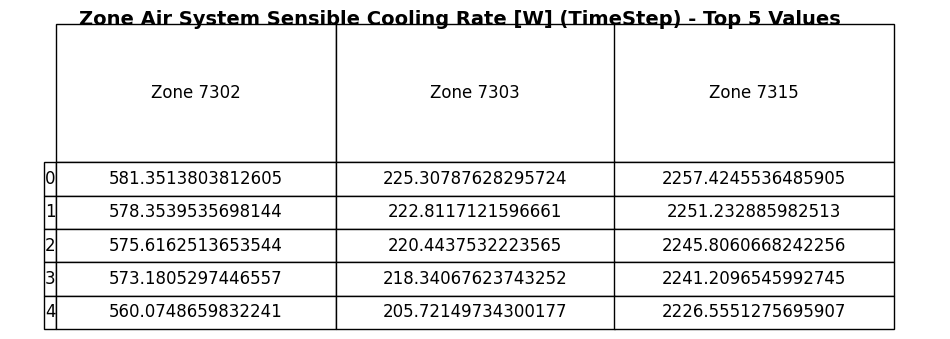

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# โหลดไฟล์ EnergyPlus CSV
df_eplus = pd.read_csv("eplusout.csv")  # แก้ชื่อไฟล์ตามจริง

# เลือกคอลัมน์ห้องที่สนใจ
cols = [
    "ZONE_CLASSROOM_7302:Zone Air System Sensible Cooling Rate [W](TimeStep)",
    "ZONE_CLASSROOM_7303:Zone Air System Sensible Cooling Rate [W](TimeStep)",
    "ZONE_CLASSROOM_7315:Zone Air System Sensible Cooling Rate [W](TimeStep)"
]

# ดึง 5 แถวแรก
top5 = df_eplus[cols].head(5)

# ย่อชื่อคอลัมน์
top5.columns = ["Zone 7302", "Zone 7303", "Zone 7315"]

# สร้างภาพตาราง
fig, ax = plt.subplots(figsize=(12, 3))  # กว้างขึ้น
ax.axis('off')  # ซ่อนแกน

# กำหนดความกว้างของคอลัมน์
col_widths = [0.3, 0.3, 0.3]

tbl = table(ax, top5, loc='center', cellLoc='center', colWidths=col_widths)
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1, 2)  # เพิ่มความสูงของ cell

# หมุนข้อความคอลัมน์
for key, cell in tbl.get_celld().items():
    if key[0] == 0:  # แถว header
        cell.get_text().set_rotation(0)  # 0 = แนวนอน, 45 = เฉียง
        cell.get_text().set_fontsize(12)
        cell.set_height(0.6)  # เพิ่มความสูง header

plt.suptitle(
    "Zone Air System Sensible Cooling Rate [W] (TimeStep) - Top 5 Values",
    fontsize=14,
    fontweight='bold',
    y=1.05  # เลื่อน title ให้อยู่เหนือ table ไม่ทับ
)
# บันทึกเป็นไฟล์ภาพ
plt.savefig("top5_cooling_rate_3rooms_wide_rotated.png", dpi=300, bbox_inches='tight')
plt.show()
